In [1]:
import tensorflow as tf

# Verificar dispositivos disponibles
print("Dispositivos disponibles:")
print(tf.config.list_physical_devices())

# Verificar si se está utilizando la GPU
print("¿GPU disponible para TensorFlow?:", tf.config.list_physical_devices('GPU'))

# Obtener información sobre la GPU
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    for gpu in gpu_devices:
        print("Nombre de la GPU:", gpu.name, gpu.device_type)
        print("Memoria total de la GPU:", gpu)
else:
    print("No se encontraron GPUs disponibles.")


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Configurar crecimiento de memoria para evitar errores de OOM
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Dispositivos disponibles:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
¿GPU disponible para TensorFlow?: []
No se encontraron GPUs disponibles.
Num GPUs Available:  0


In [ ]:
#2019
import os
import shutil
import pandas as pd

# Ruta de la carpeta que contiene las imágenes
ruta_imagenes = 'e:/DATABASES/2019/TRAIN/'

# Ruta del archivo CSV
ruta_csv = 'e:/DATABASES/2019/2019.csv'

# Leer el CSV con pandas
df = pd.read_csv(ruta_csv)

# Eliminar la columna 'UNK'
if 'UNK' in df.columns:
    df.drop(columns=['UNK'], inplace=True)

# Renombrar la columna 'AK' a 'AKIEC'
if 'AK' in df.columns:
    df.rename(columns={'AK': 'AKIEC'}, inplace=True)

# Eliminar las filas donde el valor en la columna 'SCC' es 1
if 'SCC' in df.columns:
    df = df[df['SCC'] != 1]

# Eliminar la columna 'SCC'
if 'SCC' in df.columns:
    df.drop(columns=['SCC'], inplace=True)

image_path = ruta_imagenes + df['image'] + '.jpg'
df['path_jpeg'] = image_path


columnas = ['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
class_labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

# Iterar sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Iterar sobre las etiquetas de clase
    for label in class_labels:
        # Verificar si el valor en la columna de la etiqueta actual es igual a 1
        if row[label] == 1:
            # Asignar el nombre de la etiqueta actual a la columna 'class'
            df.at[index, 'class'] = label

#---------------------- --------------------- -------------------------------------------------------------------------------------------------------------------------------------------------


# Visualizar las primeras filas del DataFrame
print(df.head())
print("Tamaño del DataFrame train:", df.shape)
conteo_por_tipo = df.iloc[:, 1:].sum()
print(conteo_por_tipo)

In [16]:
#2018
import os
import shutil
import pandas as pd

# Ruta de la carpeta que contiene las imágenes
ruta_imagenes = 'e:/DATABASES/2018/TRAIN/'

# Ruta del archivo CSV
ruta_csv = 'e:/DATABASES/2018/TRAIN2018.csv'
#ruta_csv = 'e:/DATABASES/2020/2020.csv'

# Leer el CSV con pandas
df = pd.read_csv(ruta_csv)

#MEL        Melanoma
#NV         Nevus
#BCC        Carninoma basocelular
#AKIEC      Queratosis actinica
#BKL        Queratosis seborreica
#DF         Dermatofibroma
#VASC       Lesion vascular

columnas = ['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
#columnas = ['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']

image_path = ruta_imagenes + df['image'] + '.jpg'
#path_test = directory + '/jpeg/test/' + test_df['image_name'] + '.jpg'

df['path_jpeg'] = image_path


#---------------------- AÑADIR CATEGORICAL -------------------------------------------------------------------------------------------------------------------------------------------------

# Lista de las etiquetas de clase
class_labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
#class_labels = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']

# Iterar sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Iterar sobre las etiquetas de clase
    for label in class_labels:
        # Verificar si el valor en la columna de la etiqueta actual es igual a 1
        if row[label] == 1:
            # Asignar el nombre de la etiqueta actual a la columna 'class'
            df.at[index, 'class'] = label

#---------------------- --------------------- -------------------------------------------------------------------------------------------------------------------------------------------------


# Visualizar las primeras filas del DataFrame
print(df.head())
print("Tamaño del DataFrame train:", df.shape)
conteo_por_tipo = df.iloc[:, 1:].sum()
print(conteo_por_tipo)

          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC  \
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0   
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0   
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0   
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0   
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0   

                                  path_jpeg class  
0  e:/DATABASES/2018/TRAIN/ISIC_0024306.jpg    NV  
1  e:/DATABASES/2018/TRAIN/ISIC_0024307.jpg    NV  
2  e:/DATABASES/2018/TRAIN/ISIC_0024308.jpg    NV  
3  e:/DATABASES/2018/TRAIN/ISIC_0024309.jpg    NV  
4  e:/DATABASES/2018/TRAIN/ISIC_0024310.jpg   MEL  
Tamaño del DataFrame train: (10015, 10)
MEL                                                     1113.0
NV                                                      6705.0
BCC                                                      514.0
AKIEC                                                    327.0
BKL                                                  

In [17]:
ruta_imagenes_test = 'e:/DATABASES/2018/TEST/'
ruta_csv_test = 'e:/DATABASES/2018/TEST2018.csv'

# Leer el CSV con pandas
df_test = pd.read_csv(ruta_csv_test)

columnas = ['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
class_labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

image_path_test = ruta_imagenes_test + df_test['image'] + '.jpg'
df_test['path_jpeg'] = image_path_test

# Iterar sobre cada fila del DataFrame
for index, row in df_test.iterrows():
    # Iterar sobre las etiquetas de clase
    for label in class_labels:
        # Verificar si el valor en la columna de la etiqueta actual es igual a 1
        if row[label] == 1:
            # Asignar el nombre de la etiqueta actual a la columna 'class'
            df_test.at[index, 'class'] = label

print(df_test.head())
print("Tamaño del DataFrame test:", df_test.shape)
conteo_por_tipo = df_test.iloc[:, 1:].sum()
print(conteo_por_tipo)

          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC  \
0  ISIC_0034524  0.0  1.0  0.0    0.0  0.0  0.0   0.0   
1  ISIC_0034525  0.0  1.0  0.0    0.0  0.0  0.0   0.0   
2  ISIC_0034526  0.0  0.0  0.0    0.0  1.0  0.0   0.0   
3  ISIC_0034527  0.0  1.0  0.0    0.0  0.0  0.0   0.0   
4  ISIC_0034528  0.0  1.0  0.0    0.0  0.0  0.0   0.0   

                                 path_jpeg class  
0  e:/DATABASES/2018/TEST/ISIC_0034524.jpg    NV  
1  e:/DATABASES/2018/TEST/ISIC_0034525.jpg    NV  
2  e:/DATABASES/2018/TEST/ISIC_0034526.jpg   BKL  
3  e:/DATABASES/2018/TEST/ISIC_0034527.jpg    NV  
4  e:/DATABASES/2018/TEST/ISIC_0034528.jpg    NV  
Tamaño del DataFrame test: (1512, 10)
MEL                                                      171.0
NV                                                       909.0
BCC                                                       93.0
AKIEC                                                     43.0
BKL                                                      217.

In [ ]:
#-------------- BLOQUE SI LOS DATOS ESTAN SEPARADOS EN CARPETAS ------------------------------------------------------------------------------------------------------------------------------------------------------------

# Ruta de la carpeta que contiene las imágenes
ruta_imagenes_val = 'e:/DATABASES/2018/VAL/'
ruta_csv_val = 'e:/DATABASES/2018/VAL2018.csv'

ruta_imagenes_test = 'e:/DATABASES/2018/TEST/'
ruta_csv_test = 'e:/DATABASES/2018/TEST2018.csv'


# Leer el CSV con pandas
df_val = pd.read_csv(ruta_csv_val)
df_test = pd.read_csv(ruta_csv_test)


columnas = ['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
#columnas = ['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']

image_path_val = ruta_imagenes_val + df_val['image'] + '.jpg'
df_val['path_jpeg'] = image_path_val

image_path_test = ruta_imagenes_test + df_test['image'] + '.jpg'
df_test['path_jpeg'] = image_path_test

print(df_val.head())
print("Tamaño del DataFrame val:", df_val.shape)
conteo_por_tipo = df_val.iloc[:, 1:].sum()
print(conteo_por_tipo)

print(df_test.head())
print("Tamaño del DataFrame test:", df_test.shape)
conteo_por_tipo = df_test.iloc[:, 1:].sum()
print(conteo_por_tipo)

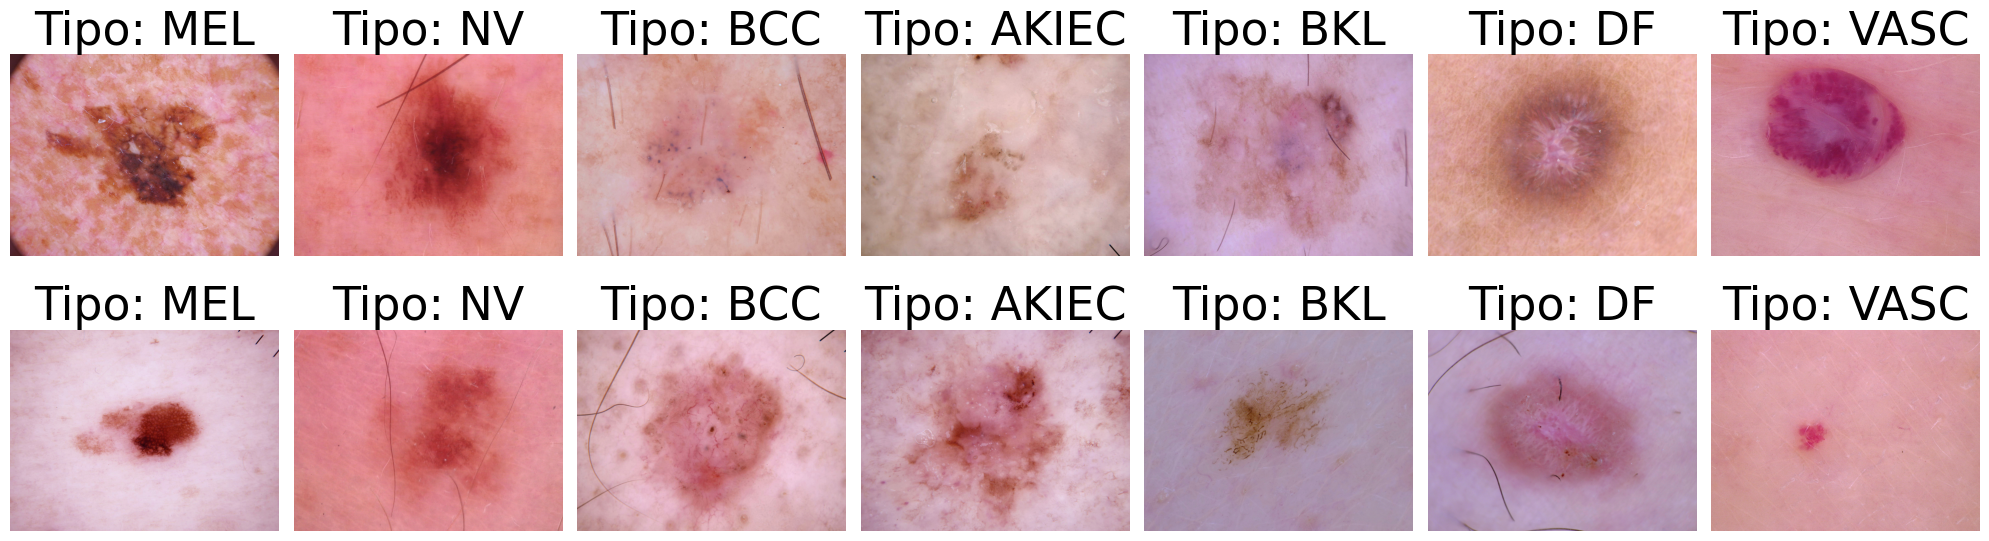

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Función para mostrar imágenes de cada tipo de lesión
def mostrar_imagenes_por_tipo(df, tipos_lesion, ruta_imagenes, cantidad=1):
    fig, axs = plt.subplots(2, 7, figsize=(20, 6))
    axs = axs.flatten()
    
    for j in range(cantidad):
        for i, tipo in enumerate(tipos_lesion):
            tipo_df = df[df['class'] == tipo]

            imagen_id = tipo_df.iloc[j]['image']
            imagen_path = os.path.join(ruta_imagenes, f"{imagen_id}.jpg")
            imagen = Image.open(imagen_path)
            ax = axs[j * len(tipos_lesion) + i]
            ax.imshow(imagen)
            ax.axis('off')
            ax.set_title(f"Tipo: {tipo}", fontsize=33) 

    plt.tight_layout()
    plt.show()

tipos_lesion=class_labels
# Mostrar dos filas de imágenes, cada fila con una imagen de cada clase
mostrar_imagenes_por_tipo(df, tipos_lesion, ruta_imagenes, cantidad=2)

In [19]:
#BLOQUE SI NO HAY QUE SEPARAR DATAFRAMES

from sklearn.model_selection import train_test_split
#train_df = df
#val_df = df_val
train_df, val_df = train_test_split(df, test_size=0.20)

test_df = df_test


prueba10_df = train_df.sample(n=10, random_state=42)


print("Tamaño del DataFrame train:", train_df.shape)
print("Tamaño del DataFrame val:", val_df.shape)
print("Tamaño del DataFrame test:", test_df.shape)

conteo_por_tipo = train_df.iloc[:, 1:].sum()
print(conteo_por_tipo)

conteo_por_tipo = val_df.iloc[:, 1:].sum()
print(conteo_por_tipo)

conteo_por_tipo = test_df.iloc[:, 1:].sum()
print(conteo_por_tipo)

Tamaño del DataFrame train: (8012, 10)
Tamaño del DataFrame val: (2003, 10)
Tamaño del DataFrame test: (1512, 10)
MEL                                                      902.0
NV                                                      5367.0
BCC                                                      412.0
AKIEC                                                    248.0
BKL                                                      872.0
DF                                                        93.0
VASC                                                     118.0
path_jpeg    e:/DATABASES/2018/TRAIN/ISIC_0026899.jpge:/DAT...
class        NVBKLNVBKLMELNVNVNVNVMELNVNVNVNVBKLNVNVNVNVAKI...
dtype: object
MEL                                                      211.0
NV                                                      1338.0
BCC                                                      102.0
AKIEC                                                     79.0
BKL                                                  

In [ ]:
#BLOQUE SEPARAR DATAFRAME EN TRAIN VAL Y TEST
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.15)


train_df, val_df = train_test_split(train_df, test_size=0.2)

print("Tamaño del DataFrame train:", train_df.shape)
print("Tamaño del DataFrame val:", val_df.shape)
print("Tamaño del DataFrame test:", test_df.shape)

# Contar cuántas imágenes hay de cada tipo
conteo_por_tipo = train_df.iloc[:, 1:].sum()
print(conteo_por_tipo)

conteo_por_tipo = val_df.iloc[:, 1:].sum()
print(conteo_por_tipo)

conteo_por_tipo = test_df.iloc[:, 1:].sum()
print(conteo_por_tipo)

In [20]:
# BLOQUE PARA EQULIBRAR MUESTRAS CON CLONADO ALEATORIO

from sklearn.utils import resample


# Función para realizar oversampling en un tipo de lesión
def oversample_tipo(df, tipo, objetivo_muestra):
    df_tipo = df[df[tipo] == 1]
    cantidad_muestra = len(df_tipo)
    if cantidad_muestra < objetivo_muestra:
        df_tipo_oversampled = resample(df_tipo, replace=True, n_samples=objetivo_muestra-cantidad_muestra)
        df_tipo_oversampled = pd.concat([df_tipo, df_tipo_oversampled])
        return df_tipo_oversampled
    elif cantidad_muestra > objetivo_muestra:
        df_tipo_undersampled = resample(df_tipo, replace=False, n_samples=objetivo_muestra)
        return df_tipo_undersampled
    else:
        return df_tipo



# Realizar oversampling en cada tipo de lesión TRAIN
max_size = train_df['NV'].value_counts().max()
train_df_oversampled = pd.DataFrame()

for tipo in tipos_lesion:
    df_tipo_oversampled = oversample_tipo(train_df, tipo, max_size)
    train_df_oversampled = pd.concat([train_df_oversampled, df_tipo_oversampled])


# Realizar oversampling en cada tipo de lesión TEST
max_size = val_df['NV'].value_counts().max()
val_df_oversampled = pd.DataFrame()

for tipo in tipos_lesion:
    df_tipo_oversampled = oversample_tipo(val_df, tipo, max_size)
    val_df_oversampled = pd.concat([val_df_oversampled, df_tipo_oversampled])



# Realizar oversampling en cada tipo de lesión TEST
max_size = test_df['NV'].value_counts().max()
test_df_oversampled = pd.DataFrame()

for tipo in tipos_lesion:
    df_tipo_oversampled = oversample_tipo(test_df, tipo, max_size)
    test_df_oversampled = pd.concat([test_df_oversampled, df_tipo_oversampled])

# Verificar el nuevo tamaño del DataFrame
print("Tamaño del DataFrame después de oversampling:", train_df_oversampled.shape)
print("Tamaño del DataFrame después de oversampling:", val_df_oversampled.shape)
print("Tamaño del DataFrame después de oversampling:", test_df_oversampled.shape)

# Contar cuántas imágenes hay de cada tipo
conteo_por_tipo = train_df_oversampled.iloc[:, 1:].sum()
print(conteo_por_tipo)

conteo_por_tipo = val_df_oversampled.iloc[:, 1:].sum()
print(conteo_por_tipo)

conteo_por_tipo = test_df_oversampled.iloc[:, 1:].sum()
print(conteo_por_tipo)


prueba10_df = train_df_oversampled.sample(n=10, random_state=42)

Tamaño del DataFrame después de oversampling: (37569, 10)
Tamaño del DataFrame después de oversampling: (9366, 10)
Tamaño del DataFrame después de oversampling: (6363, 10)
MEL                                                     5367.0
NV                                                      5367.0
BCC                                                     5367.0
AKIEC                                                   5367.0
BKL                                                     5367.0
DF                                                      5367.0
VASC                                                    5367.0
path_jpeg    e:/DATABASES/2018/TRAIN/ISIC_0024999.jpge:/DAT...
class        MELMELMELMELMELMELMELMELMELMELMELMELMELMELMELM...
dtype: object
MEL                                                     1338.0
NV                                                      1338.0
BCC                                                     1338.0
AKIEC                                                   13

C:\Users\artur\AppData\Local\Temp\ipykernel_6364\1428169003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df_oversampled, x='class', palette='dark')


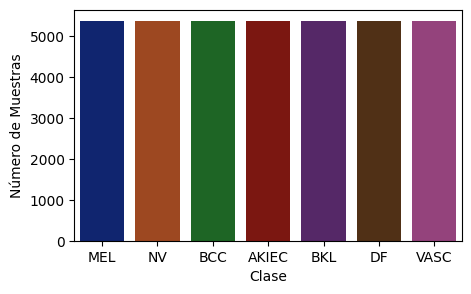

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de barras para ver el balance de clases
plt.figure(figsize=(5, 3))
sns.countplot(data=train_df_oversampled, x='class', palette='dark')
plt.xlabel('Clase')
plt.ylabel('Número de Muestras')
plt.show()

In [ ]:
# Ruta de la imagen que deseas cargar
image_path = 'E:/DATABASES/2018/TRAIN/ISIC_0024306.jpg'

def color_constancy(image, width=224, height=224, inter=cv2.INTER_AREA):

    upgraded_model = 1  # Usar upgraded_model=1 para cargar nuestro nuevo modelo que se ha mejorado con nuevos ejemplos de entrenamiento
    gamut_mapping = 2  # Usar gamut_mapping=1 para escalado, 2 para recorte

    wbModel = wb_srgb.WBsRGB(gamut_mapping=gamut_mapping, upgraded=upgraded_model)
   
    return wbModel.correctImage(image)

# Definir las transformaciones de data augmentation
transform = A.Compose([
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.GaussNoise(var_limit=(5, 50)),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.75),
    #A.OneOf([ A.MotionBlur(blur_limit=5), A.MedianBlur(blur_limit=5),A.GaussianBlur(blur_limit=5), A.GaussNoise(var_limit=(5, 50)),], p=0.7),
    A.OneOf([ A.OpticalDistortion(distort_limit=1.0), A.GridDistortion(num_steps=5, distort_limit=1.), A.ElasticTransform(alpha=3),], p=0.7),   
    #A.CLAHE(clip_limit=4.0, p=0.7),
    #A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
    #A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
    A.Resize(224, 224),
    #A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()  # Convierte la imagen a un tensor de TensorFlow
])

def augment_image(image):

    image_np = tf.image.decode_jpeg(image, channels=3)
    image = image_np.numpy()
    print("Dimensiones de la imagen   1:", image.shape)
    print("Tipo de datos de la imagen 1:", image.dtype)
    print("Valor máximo de la imagen  1:", np.max(image))
    print("Valor mínimo de la imagen  1:", np.min(image))
    augmented = transform(image=image_np.numpy())
    augmented_image = augmented['image']

    print("Dimensiones de la imagen:  2", augmented_image.shape)
    print("Tipo de datos de la imagen 2:", augmented_image.dtype)
    print("Valor máximo de la imagen: 2", np.max(augmented_image.numpy()))
    print("Valor mínimo de la imagen: 2", np.min(augmented_image.numpy()))

    # Asegurarse de que las dimensiones de la imagen son (224, 224, 3)
    augmented_image = augmented_image.transpose(0,1)
    augmented_image = augmented_image.transpose(1,2)

    return augmented_image

# Cargar la imagen
image = tf.io.read_file(image_path)

#image = tf.image.decode_jpeg(image, channels=3)  # Decodificar la imagen

image = augment_image(image)

# Verificar el tipo de datos y dimensiones de la imagen
print("Tipo de datos de la imagen:", image.dtype)
print("Dimensiones de la imagen:", image.shape)
plt.imshow(image)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
#import tensorflow as tf
from classes import WBsRGB as wb_srgb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

# Imprimir versiones para confirmar instalación
print("Albumentations version:", A.__version__)
print("OpenCV version:", cv2.__version__)

# Parámetros para la generación de imágenes
image_size = (224, 224)
batch_size = 32

# Definir las transformaciones de data augmentation
transform = A.Compose([
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=(0.2), contrast_limit=(0.2), p=0.75),
    A.OneOf([ A.MotionBlur(blur_limit=5), A.MedianBlur(blur_limit=5),A.GaussianBlur(blur_limit=5), A.GaussNoise(var_limit=(5, 30)),], p=0.7),
    A.OneOf([ A.OpticalDistortion(distort_limit=1.0), A.GridDistortion(num_steps=5, distort_limit=1.), A.ElasticTransform(alpha=3),], p=0.7),   
    A.CLAHE(clip_limit=4.0, p=0.7),
    A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=10, val_shift_limit=5, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
    A.Resize(224, 224),
    #A.Normalize(),
    ToTensorV2()  # Convierte la imagen a un tensor de TensorFlow
])

def augment_image(image):

    image_uint8 = image.astype(np.uint8)
    
    augmented = transform(image=image_uint8)
    augment_image = augmented['image']

    augment_image=augment_image/255
    augment_image = augment_image.transpose(0,1)
    augment_image = augment_image.transpose(1,2)
    
    return augment_image


def generator_with_augmentation(generator):
    while True:
        x_batch, y_batch = next(generator)  # Obtener un lote del generador original
        x_batch_aug = np.array([augment_image(image=x) for x in x_batch])  # Aplicar augmentación
        x_batch_aug = x_batch_aug.astype(np.float32)
        yield x_batch_aug, y_batch  # Devolver el lote aumentado junto con las etiquetas originales

    
#-------------------------------------------------------------------------------------------

def color_constancy(image, width=224, height=224, inter=cv2.INTER_AREA):

    upgraded_model = 1  # Usar upgraded_model=1 para cargar nuestro nuevo modelo que se ha mejorado con nuevos ejemplos de entrenamiento
    gamut_mapping = 2  # Usar gamut_mapping=1 para escalado, 2 para recorte

    wbModel = wb_srgb.WBsRGB(gamut_mapping=gamut_mapping, upgraded=upgraded_model)
   
    return wbModel.correctImage(image)


def random(image):
   

    img = tf.image.random_flip_left_right(image)
    img = tf.image.random_saturation(img, 0.7, 1.3)
    img = tf.image.random_contrast(img, 0.8, 1.2)
    img = tf.image.random_brightness(img, 0.2)
    #img = color_constancy(img)

    return img

#-------------------------------------------------------------------------------------------

datagen = ImageDataGenerator(
    #rescale=1. / 255,
    #fill_mode='reflect',
    #rotation_range = 180,
    #horizontal_flip = True,
    #vertical_flip = True,
    #brightness_range = [0.3,1.2],
    #shear_range=0.2,
    #zoom_range=0.3,
)

datagen_test = ImageDataGenerator(
    rescale=1. / 255,
    #preprocessing_function=color_constancy,
)


# Generador de imágenes para entrenamiento -------------------------------------------------
train_generator = datagen.flow_from_dataframe(
    train_df_oversampled,
    #train_df,
    x_col = 'path_jpeg',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True,
)

train_generator_augmented=generator_with_augmentation(train_generator)

#-------------------------------------------------------------------------------------------

# Generador de imágenes para validación
val_generator = datagen_test.flow_from_dataframe(
    val_df_oversampled,
    #val_df,
    x_col = 'path_jpeg',
    #y_col = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"],
    #y_col = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    #subset = 'validation',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True
)

# Generador de imágenes para prueba
test_generator = datagen_test.flow_from_dataframe(
    test_df,
    x_col = 'path_jpeg',
    #y_col = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'],
    #y_col = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=image_size,         #PROBAR MEJOR RECALL
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

#----- PROBAR EL DATA GEN  -------------------------------------------------------------------------------- 

datagen_original = ImageDataGenerator(
    rescale=1. / 255,
)

datagenT = ImageDataGenerator(
    #rescale=1. / 255,
    rotation_range=360,
    shear_range=15, 
    horizontal_flip=True, 
    preprocessing_function=color_constancy,
    brightness_range = [0.8,1.2],
    featurewise_center=True,
    featurewise_std_normalization=True,
    fill_mode='reflect',
    #validation_split=0.2 #20% para pruebas
)

prueba10_generator = datagen.flow_from_dataframe(
    prueba10_df,
    x_col = 'path_jpeg',
    #y_col = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'],
    #y_col = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    subset = 'training',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False
)

prueba10_generator_augmented=generator_with_augmentation(prueba10_generator)

prueba10_tgenerator = datagen_original.flow_from_dataframe(
    prueba10_df,
    x_col = 'path_jpeg',
    #y_col = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'],
    #y_col = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.7). Upgrade using: pip install --upgrade albumentations


Albumentations version: 1.4.7
OpenCV version: 4.9.0


C:\Users\artur\AppData\Roaming\Python\Python311\site-packages\albumentations\augmentations\blur\transforms.py:240: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


Found 37569 validated image filenames belonging to 7 classes.
Found 9366 validated image filenames belonging to 7 classes.
Found 1512 validated image filenames belonging to 7 classes.
Found 10 validated image filenames belonging to 5 classes.
Found 10 validated image filenames belonging to 5 classes.


In [8]:
batch_size = batch_size
steps_per_epoch = train_generator.n // batch_size
validation_steps = val_generator.n // batch_size

# Reducir el número de pasos por época y de validación en un factor de 5 en cada época
reduccion_factor = 4
steps_per_epoch = int(steps_per_epoch / reduccion_factor)
validation_steps = int(validation_steps / reduccion_factor)

print (batch_size)
print (steps_per_epoch)
print (validation_steps)

32
291
74


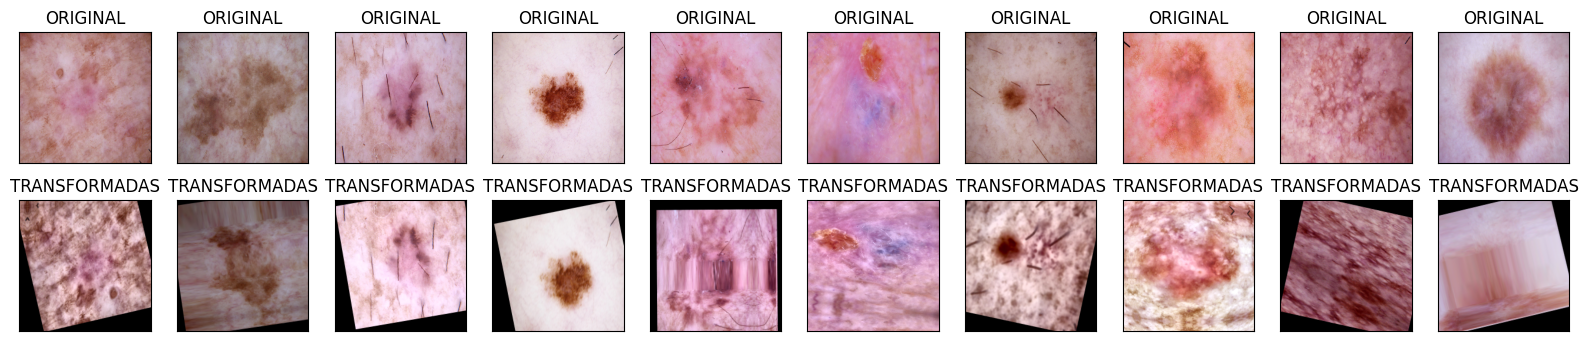

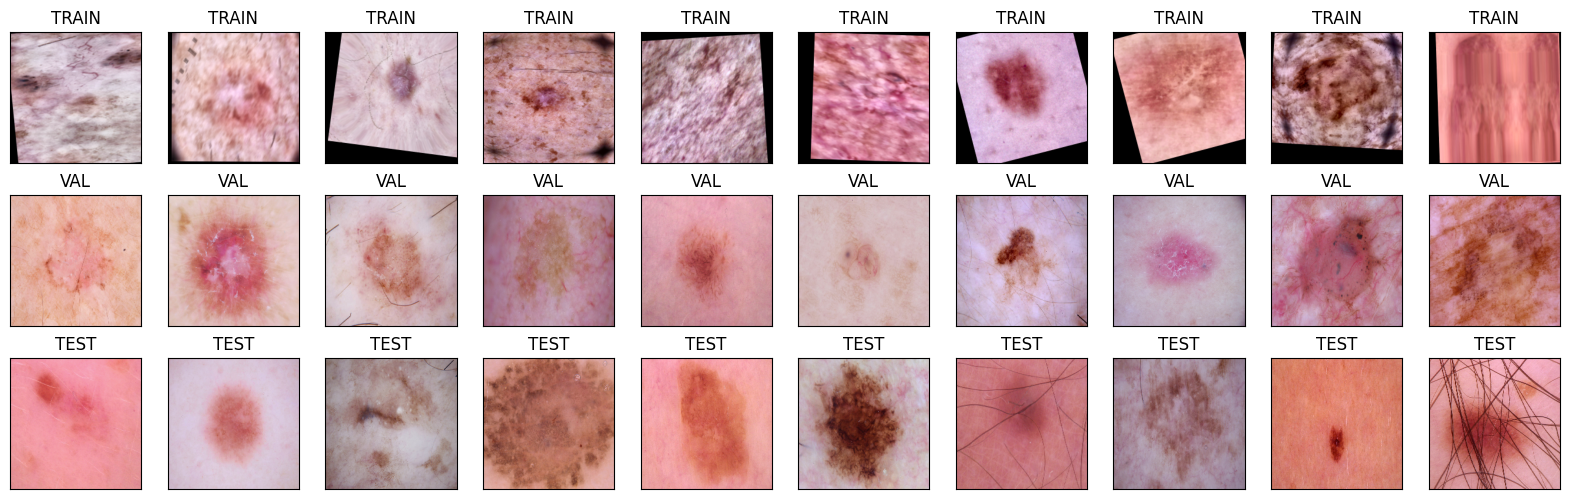

In [9]:
# Generar imágenes transformadas y originales
transformed_images, _ = next(prueba10_generator_augmented)
original_images, _ = next(prueba10_tgenerator)
train_images, _ = next(train_generator_augmented)
val_images, _ = next(val_generator)
test_images, _ = next(test_generator)


# Mostrar las imágenes en una fila
plt.figure(figsize=(20, 4))
for i in range(10):
    # Imagen transformada
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_images[i])
    plt.title('ORIGINAL')
    plt.xticks([])
    plt.yticks([])
    
    # Imagen original
    plt.subplot(2, 10, i + 11)
    plt.imshow(transformed_images[i])
    plt.title('TRANSFORMADAS')
    plt.xticks([])
    plt.yticks([])
plt.show()

# Mostrar las imágenes en una fila
plt.figure(figsize=(20, 6))
for i in range(10):

    plt.subplot(3, 10, i + 1)
    plt.imshow(train_images[i])
    plt.title('TRAIN')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 10, i + 11)
    plt.imshow(val_images[i])
    plt.title('VAL')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3, 10, i + 21)
    plt.imshow(test_images[i])
    plt.title('TEST')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [14]:
#VERSION EFFI
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
import efficientnet.tfkeras as efn

EFNS = [efn.EfficientNetB0, efn.EfficientNetB1, efn.EfficientNetB2, efn.EfficientNetB3,
        efn.EfficientNetB4, efn.EfficientNetB5, efn.EfficientNetB6]

def build_model(dim, ef):
    
    inp = tf.keras.layers.Input(shape=(dim,dim,3))
    base = EFNS[ef](input_shape=(dim,dim,3),weights='imagenet',include_top=False)

    for layer in base.layers[:200]:
        layer.trainable = False
    

    x = base(inp)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    #x = Dense(256, activation='relu')(x)
    #x = Dense(128, activation='relu')(x)
    #x = Dense(64, activation='relu')(x)
    output = Dense(7, activation='softmax')(x)

    model = tf.keras.Model(inputs=inp,outputs=output)
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05)
    model.compile(optimizer=opt,loss=loss,metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    return model

In [7]:
#DENSENET 121
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
import tensorflow as tf

def build_model(dim):
    # Definir la entrada
    inp = Input(shape=(dim, dim, 3))
    
    # Cargar el modelo base DenseNet121 con pesos pre-entrenados de ImageNet
    base = DenseNet121(input_shape=(dim, dim, 3), weights='imagenet', include_top=False)

    for layer in base.layers[:0]:
        layer.trainable = False
    
    
    # Añadir la capa de base y la capa de agrupamiento global
    x = base(inp)
    x = GlobalAveragePooling2D()(x)

    
    # Añadir capas densas adicionales para la clasificación
    #x = Dense(256, activation='relu')(x)
    #x = Dense(128, activation='relu')(x)
    
    # Capa de salida para la clasificación
    output = Dense(7, activation='softmax', kernel_regularizer=l1(0.01))(x)  # 7 clases en tu caso
    
    # Compilar el modelo
    model = Model(inputs=inp, outputs=output)
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05)
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    
    return model

model = build_model(dim=224)

In [10]:
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
import tensorflow as tf

def build_model(dim):
    # Definir la entrada
    inp = Input(shape=(dim, dim, 3))
    
    # Cargar el modelo base NASNetMobile con pesos pre-entrenados de ImageNet
    base = NASNetMobile(input_shape=(dim, dim, 3), weights='imagenet', include_top=False)
    
    for layer in base.layers[:400]:
        layer.trainable = False
    
    # Añadir la capa de base y la capa de agrupamiento global
    x = base(inp)
    x = GlobalAveragePooling2D()(x)

    # Añadir capas densas adicionales para la clasificación (opcional)
    # x = Dense(256, activation='relu')(x)
    # x = Dense(128, activation='relu')(x)
    
    # Capa de salida para la clasificación
    #output = Dense(7, activation='softmax', kernel_regularizer=l1(0.01))(x)  # 7 clases en tu caso
    output = Dense(7, activation='softmax')(x)  # 7 clases en tu caso
    
    # Compilar el modelo
    model = Model(inputs=inp, outputs=output)
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05)
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    
    return model

# Construir el modelo con dimensiones de entrada 224x224
model = build_model(dim=224)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_average_pooling2d_5  (None, 1056)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 7)                 7399      
                                                                 
Total params: 4277115 (16.32 MB)
Trainable params: 3662039 (13.97 MB)
Non-trainable params: 615076 (2.35 MB)
_________________________________________________________________


In [ ]:
model = build_model(dim=224,ef=0)

In [8]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_3  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 7)                 7175      
                                                                 
Total params: 7044679 (26.87 MB)
Trainable params: 6961031 (26.55 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


In [13]:
tf.keras.backend.clear_session()

In [15]:
#TRAINING
# Configurar callbacks (opcional)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=4, restore_best_weights=True),  # Detener el entrenamiento si no mejora después de 10 épocas
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001, min_delta=0.0001),

    ModelCheckpoint('best_model.h5', save_best_only=True)  # Guardar el mejor modelo en un archivo
]

EPOCAS = 50
#steps_per_epoch= steps_per_epoch
#validation_steps= validation_steps


historial = model.fit( train_generator_augmented, epochs=EPOCAS,steps_per_epoch= steps_per_epoch,validation_steps= validation_steps, batch_size=batch_size, validation_data=val_generator, callbacks=callbacks, verbose=1)


Epoch 1/50



291/291 [==============================] - ETA: 0s - loss: 1.4096 - accuracy: 0.4882 - precision_4: 0.7591 - recall_4: 0.2490

c:\Users\artur\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


291/291 [==============================] - 414s 1s/step - loss: 1.4096 - accuracy: 0.4882 - precision_4: 0.7591 - recall_4: 0.2490 - val_loss: 1.5241 - val_accuracy: 0.4696 - val_precision_4: 0.6843 - val_recall_4: 0.2399 - lr: 1.0000e-04
Epoch 2/50
291/291 [==============================] - 358s 1s/step - loss: 1.1073 - accuracy: 0.6300 - precision_4: 0.7805 - recall_4: 0.4618 - val_loss: 1.4512 - val_accuracy: 0.4996 - val_precision_4: 0.6387 - val_recall_4: 0.3209 - lr: 1.0000e-04
Epoch 3/50
291/291 [==============================] - 336s 1s/step - loss: 0.9869 - accuracy: 0.6791 - precision_4: 0.8010 - recall_4: 0.5519 - val_loss: 1.3727 - val_accuracy: 0.5274 - val_precision_4: 0.6612 - val_recall_4: 0.3758 - lr: 1.0000e-04
Epoch 4/50
291/291 [==============================] - 333s 1s/step - loss: 0.9013 - accuracy: 0.7229 - precision_4: 0.8205 - recall_4: 0.6105 - val_loss: 1.3094 - val_accuracy: 0.5718 - val_precision_4: 0.6912 - val_recall_4: 0.4717 - lr: 1.0000e-04
Epoch 5/50


In [16]:
# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred = model.predict(test_generator)

# Obtener las etiquetas verdaderas del conjunto de datos de prueba
y_true = test_generator.labels

48/48 [==============================] - 30s 536ms/step


In [17]:
 # Evaluar el modelo en los datos de prueba generados
evaluation = model.evaluate(test_generator)

48/48 [==============================] - 19s 390ms/step - loss: 0.9124 - accuracy: 0.7123 - precision_4: 0.7651 - recall_4: 0.6634


In [18]:
# Imprimir todas las métricas disponibles
print("Métricas disponibles:")
print(model.metrics_names)
print("Valores de las métricas:", evaluation)

Métricas disponibles:
['loss', 'accuracy', 'precision_4', 'recall_4']
Valores de las métricas: [0.9124345779418945, 0.7123016119003296, 0.7650648355484009, 0.6633597612380981]


{'AKIEC': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'VASC': 6}
(1512, 7)
float32


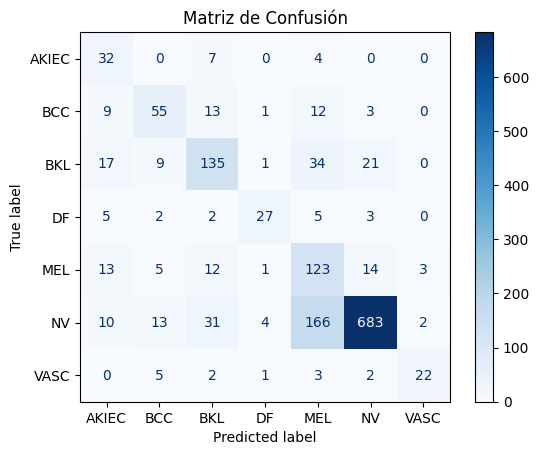

Métricas por clase:
Clase 0: Precisión = 0.3721, Recall = 0.7442, F1-Score = 0.4961
Clase 1: Precisión = 0.6180, Recall = 0.5914, F1-Score = 0.6044
Clase 2: Precisión = 0.6683, Recall = 0.6221, F1-Score = 0.6444
Clase 3: Precisión = 0.7714, Recall = 0.6136, F1-Score = 0.6835
Clase 4: Precisión = 0.3545, Recall = 0.7193, F1-Score = 0.4749
Clase 5: Precisión = 0.9408, Recall = 0.7514, F1-Score = 0.8355
Clase 6: Precisión = 0.8148, Recall = 0.6286, F1-Score = 0.7097
Balanced Multiclass Accuracy: 0.6672264337539673


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(test_generator.class_indices)
print(y_pred.shape)
print(y_pred.dtype)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)

# Configurar y mostrar el gráfico
plt.xticks(rotation=0)
plt.title('Matriz de Confusión')
plt.show()

# Convertir conf_matrix a un tensor de TensorFlow
conf_matrix_tf = tf.convert_to_tensor(conf_matrix, dtype=tf.float32)

# Precisión por clase (precision)
precision = tf.linalg.diag_part(conf_matrix_tf) / tf.reduce_sum(conf_matrix_tf, axis=0)

# Recall por clase (recall)
recall = tf.linalg.diag_part(conf_matrix_tf) / tf.reduce_sum(conf_matrix_tf, axis=1)

# Calcular el puntaje F1 por clase
f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)

# Imprimir métricas por clase y puntajes F1
print("Métricas por clase:")
for i in range(len(precision)):
    print(f"Clase {i}: Precisión = {precision[i].numpy():.4f}, Recall = {recall[i].numpy():.4f}, F1-Score = {f1_score[i].numpy():.4f}")

# Calcular la exactitud equilibrada (balanced accuracy)
balanced_accuracy = tf.reduce_mean(recall).numpy()
print(f"Balanced Multiclass Accuracy: {balanced_accuracy}")

[[195  39  30]
 [183 725  44]
 [ 58  48 190]]
[1 1 2 ... 2 1 0]
[1 1 2 ... 1 2 0]
CANCER:  [5 5 2 ... 2 5 4]    [5 5 2 ... 2 5 4]


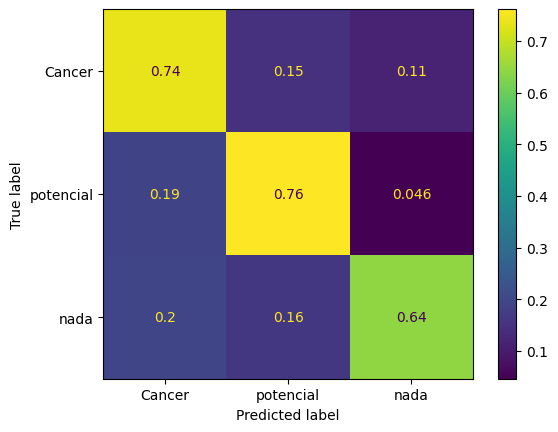

Métricas por clase:
Clase 0: Precisión = 0.44724770642201833, Recall = 0.7386363636363636, F1-Score = 0.557142857095876
Clase 1: Precisión = 0.8928571428571429, Recall = 0.7615546218487395, F1-Score = 0.8219954648029227
Clase 2: Precisión = 0.7196969696969697, Recall = 0.6418918918918919, F1-Score = 0.6785714285215918
Balanced Multiclass Accuracy: 0.7140276257923318


In [20]:
#MATRIZ BUENA SEGUN EL RIESGO DEL TIPO DE LESION

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_risk = []
x_true_risk = []

# Mapear las etiquetas a categorías de riesgo
for label in np.argmax(y_pred, axis=1):
    if label == 0:
        y_pred_risk.append(1)  # AKIEC     - POTENCIAL
    if label == 1:
        y_pred_risk.append(0)  # BCC       - CANCER
    if label == 2:
        y_pred_risk.append(2)  # BKL       - NADA
    if label == 3:
        y_pred_risk.append(2)  # DF        - NADA
    if label == 4:
        y_pred_risk.append(0)  # MEL       - CANCER
    if label == 5:
        y_pred_risk.append(1)  # NV        - POTENCIAL
    if label == 6:
        y_pred_risk.append(2)  # VASC      - NADA

for label in y_true:
    if label == 0:
        x_true_risk.append(1) 
    if label == 1:
        x_true_risk.append(0)  
    if label == 2:
        x_true_risk.append(2)  
    if label == 3:
        x_true_risk.append(2)  
    if label == 4:
        x_true_risk.append(0)  
    if label == 5:
        x_true_risk.append(1)  
    if label == 6:
        x_true_risk.append(2) 

#print(len(y_pred))
#print(len(y_true))
#print(np.argmax(y_pred, axis=1))
#print(y_true)
#print(len(y_pred_risk))
#print(len(x_true_risk))
#print(y_pred_risk)
#print(x_true_risk)
y_pred_np = np.array(y_pred_risk)
y_true_np = np.array(x_true_risk)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true_np, y_pred_np)

print(conf_matrix)
print(y_pred_np)
print(y_true_np)
print("CANCER: ", np.argmax(y_pred, axis=1), "  ", np.argmax(y_pred, axis=1))

conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_norm, display_labels=["Cancer", "potencial", "nada"]) #display_labels=["Cancer", "potencial", "nada"]
disp.plot()
plt.show()

# Precisión por clase (precision)
precision = tf.linalg.diag_part(conf_matrix) / tf.reduce_sum(conf_matrix, axis=0)
# Recall por clase (recall)
recall = tf.linalg.diag_part(conf_matrix) / tf.reduce_sum(conf_matrix, axis=1)

# Calcular el puntaje F1 por clase
f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)

# Imprimir métricas por clase y puntajes F1
print("Métricas por clase:")
for i in range(len(precision)):
    print(f"Clase {i}: Precisión = {precision[i]}, Recall = {recall[i]}, F1-Score = {f1_score[i]}")

# Calcular la exactitud equilibrada (balanced accuracy)
balanced_accuracy = tf.reduce_mean(recall).numpy()
print(f"Balanced Multiclass Accuracy: {balanced_accuracy}")

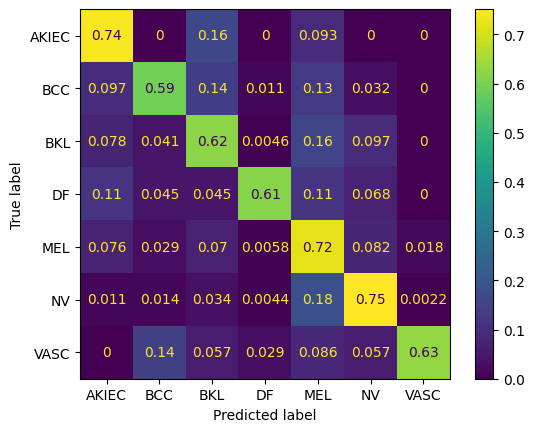

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Mostrar una imagen de cada tipo de lesión

tipos_lesion = ['AKIEC', 'BCC', 'BKL', 'DF','MEL', 'NV', 'VASC']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Normalizar la matriz de confusión
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_norm, display_labels=tipos_lesion)
disp.plot()
plt.show()

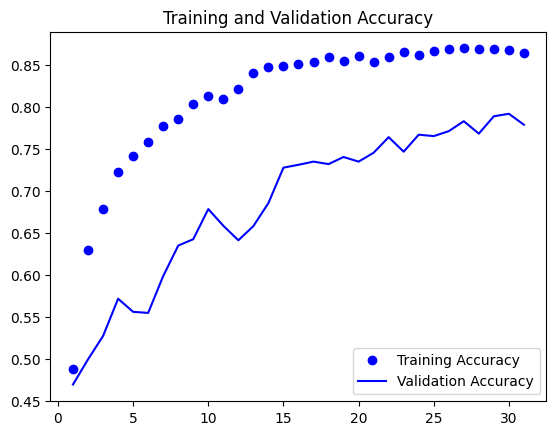

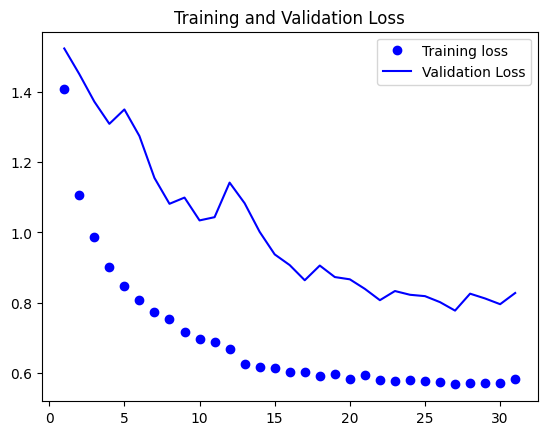

In [22]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']
loss = historial.history['loss']
val_loss = historial.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
# Directorio donde se guardará el modelo
model_dir = 'c:/Users/artur/Desktop/TFGEst/redes/effib0-D31/modelo/'
model_dir_h5 = 'c:/Users/artur/Desktop/TFGEst/redes/effib0-D31/weights.h5'



# Guardar el modelo
model.save(model_dir_h5)
model.save(model_dir)

print("Modelo guardado correctamente.")

In [ ]:
from sklearn.metrics import roc_curve, auc

# Supongamos que 'etiquetas_reales_numericas' es una lista o array con las etiquetas reales (0 o 1)
# Y 'predicciones' es un numpy ndarray con las probabilidades de las predicciones

# Calcular la curva ROC
fpr, tpr, umbrales = roc_curve(etiquetas_reales, predicciones)

# Calcular el área bajo la curva ROC (AUC)
auc_roc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [24]:
from tensorflow.keras.models import load_model # type: ignore
import numpy as np
import efficientnet.tfkeras as efn

model1 = load_model('c:/Users/artur/Desktop/TFGEst/redes/effib0-D112/weights.h5')
model2 = load_model('c:/Users/artur/Desktop/TFGEst/redes/effib0-D22/weights.h5')
model3 = load_model('c:/Users/artur/Desktop/TFGEst/redes/effib0-D31/weights.h5')

# Obtener las predicciones de los modelos
y_pred1 = model1.predict(test_generator)
y_pred2 = model2.predict(test_generator)
y_pred3 = model3.predict(test_generator)


# Obtener las etiquetas verdaderas del conjunto de datos de prueba
y_true = test_generator.labels


# Promedio de las probabilidades predichas
ensemble_pred = (y_pred1 + y_pred2 + y_pred3) / 3

# Predicción final
final_pred = np.argmax(ensemble_pred, axis=1)

48/48 [==============================] - 20s 345ms/step


In [46]:
from sklearn.metrics import accuracy_score

# Supongamos que las etiquetas verdaderas de prueba están en test_generator.classes
accuracy = accuracy_score(test_generator.classes, final_pred)
print(f'Accuracy of the ensemble model: {accuracy}')

Accuracy of the ensemble model: 0.8068783068783069


{'AKIEC': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'VASC': 6}
(1512, 7)
float32


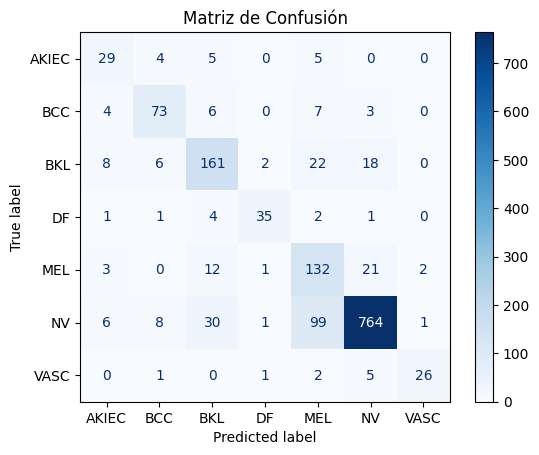

Métricas por clase:
Clase 0: Precisión = 0.5686, Recall = 0.6744, F1-Score = 0.6170
Clase 1: Precisión = 0.7849, Recall = 0.7849, F1-Score = 0.7849
Clase 2: Precisión = 0.7385, Recall = 0.7419, F1-Score = 0.7402
Clase 3: Precisión = 0.8750, Recall = 0.7955, F1-Score = 0.8333
Clase 4: Precisión = 0.4907, Recall = 0.7719, F1-Score = 0.6000
Clase 5: Precisión = 0.9409, Recall = 0.8405, F1-Score = 0.8879
Clase 6: Precisión = 0.8966, Recall = 0.7429, F1-Score = 0.8125
Balanced Multiclass Accuracy: 0.7645750641822815


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(test_generator.class_indices)
print(ensemble_pred.shape)
print(ensemble_pred.dtype)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, np.argmax(ensemble_pred, axis=1))

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)

# Configurar y mostrar el gráfico
plt.xticks(rotation=0)
plt.title('Matriz de Confusión')
plt.show()

# Convertir conf_matrix a un tensor de TensorFlow
conf_matrix_tf = tf.convert_to_tensor(conf_matrix, dtype=tf.float32)

# Precisión por clase (precision)
precision = tf.linalg.diag_part(conf_matrix_tf) / tf.reduce_sum(conf_matrix_tf, axis=0)

# Recall por clase (recall)
recall = tf.linalg.diag_part(conf_matrix_tf) / tf.reduce_sum(conf_matrix_tf, axis=1)

# Calcular el puntaje F1 por clase
f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)

# Imprimir métricas por clase y puntajes F1
print("Métricas por clase:")
for i in range(len(precision)):
    print(f"Clase {i}: Precisión = {precision[i].numpy():.4f}, Recall = {recall[i].numpy():.4f}, F1-Score = {f1_score[i].numpy():.4f}")

# Calcular la exactitud equilibrada (balanced accuracy)
balanced_accuracy = tf.reduce_mean(recall).numpy()
print(f"Balanced Multiclass Accuracy: {balanced_accuracy}")

[[212  31  21]
 [116 799  37]
 [ 34  33 229]]
[1 1 2 ... 1 2 0]
[1 1 2 ... 1 2 0]
CANCER:  [5 5 2 ... 0 2 4]    [5 5 2 ... 0 2 4]


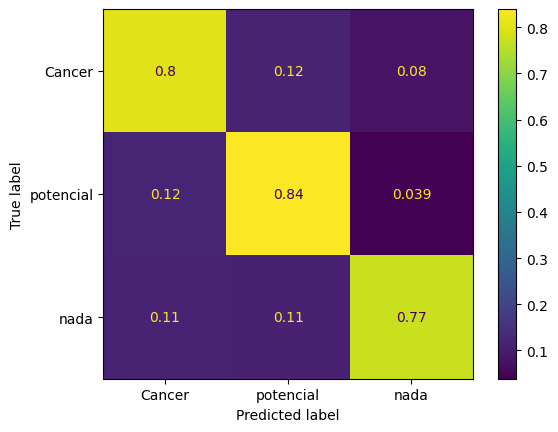

Métricas por clase:
Clase 0: Precisión = 0.585635359116022, Recall = 0.803030303030303, F1-Score = 0.6773162938809378
Clase 1: Precisión = 0.9258400926998841, Recall = 0.8392857142857143, F1-Score = 0.8804407712999824
Clase 2: Precisión = 0.7979094076655052, Recall = 0.7736486486486487, F1-Score = 0.7855917666738542
Balanced Multiclass Accuracy: 0.8053215553215552


In [43]:
#MATRIZ BUENA SEGUN EL RIESGO DEL TIPO DE LESION

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_risk = []
x_true_risk = []

# Mapear las etiquetas a categorías de riesgo
for label in np.argmax(ensemble_pred, axis=1):
    if label == 0:
        y_pred_risk.append(1)  # AKIEC     - POTENCIAL
    if label == 1:
        y_pred_risk.append(0)  # BCC       - CANCER
    if label == 2:
        y_pred_risk.append(2)  # BKL       - NADA
    if label == 3:
        y_pred_risk.append(2)  # DF        - NADA
    if label == 4:
        y_pred_risk.append(0)  # MEL       - CANCER
    if label == 5:
        y_pred_risk.append(1)  # NV        - POTENCIAL
    if label == 6:
        y_pred_risk.append(2)  # VASC      - NADA

for label in y_true:
    if label == 0:
        x_true_risk.append(1) 
    if label == 1:
        x_true_risk.append(0)  
    if label == 2:
        x_true_risk.append(2)  
    if label == 3:
        x_true_risk.append(2)  
    if label == 4:
        x_true_risk.append(0)  
    if label == 5:
        x_true_risk.append(1)  
    if label == 6:
        x_true_risk.append(2) 


y_pred_np = np.array(y_pred_risk)
y_true_np = np.array(x_true_risk)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true_np, y_pred_np)

print(conf_matrix)
print(y_pred_np)
print(y_true_np)
print("CANCER: ", np.argmax(ensemble_pred, axis=1), "  ", np.argmax(ensemble_pred, axis=1))

conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_norm, display_labels=["Cancer", "potencial", "nada"]) #display_labels=["Cancer", "potencial", "nada"]
disp.plot()
plt.show()

# Precisión por clase (precision)
precision = tf.linalg.diag_part(conf_matrix) / tf.reduce_sum(conf_matrix, axis=0)
# Recall por clase (recall)
recall = tf.linalg.diag_part(conf_matrix) / tf.reduce_sum(conf_matrix, axis=1)

# Calcular el puntaje F1 por clase
f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)

# Imprimir métricas por clase y puntajes F1
print("Métricas por clase:")
for i in range(len(precision)):
    print(f"Clase {i}: Precisión = {precision[i]}, Recall = {recall[i]}, F1-Score = {f1_score[i]}")

# Calcular la exactitud equilibrada (balanced accuracy)
balanced_accuracy = tf.reduce_mean(recall).numpy()
print(f"Balanced Multiclass Accuracy: {balanced_accuracy}")

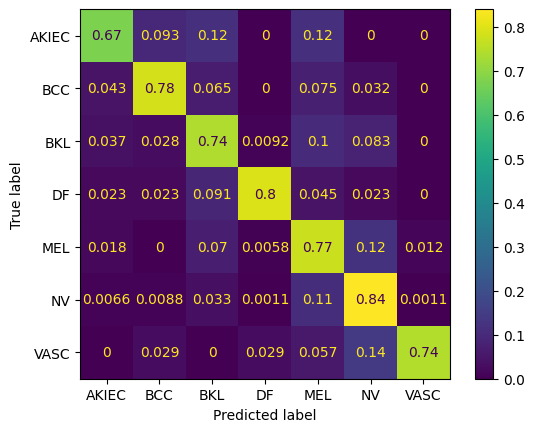

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Mostrar una imagen de cada tipo de lesión

tipos_lesion = ['AKIEC', 'BCC', 'BKL', 'DF','MEL', 'NV', 'VASC']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, np.argmax(ensemble_pred, axis=1))

# Normalizar la matriz de confusión
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_norm, display_labels=tipos_lesion)
disp.plot()
plt.show()

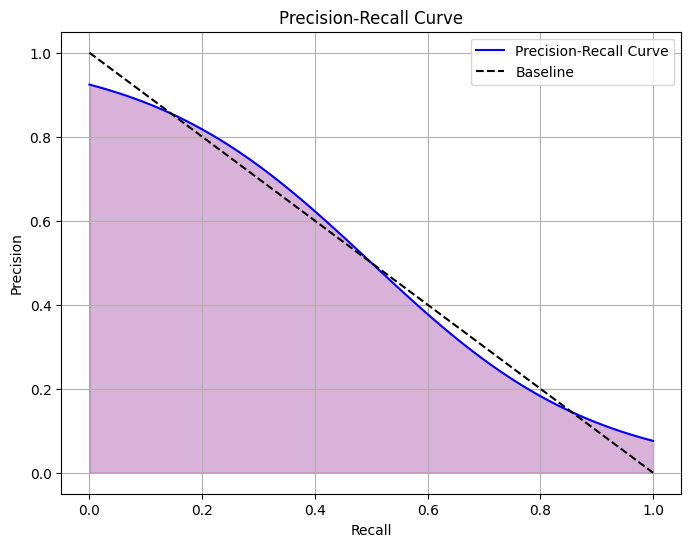

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Simular datos para la curva Precision-Recall
recall = np.linspace(0, 1, 100)
precision = 1 / (1 + np.exp(5 * (recall - 0.5)))  # Crear una curva sigmoidea para mayor realismo

# Crear la gráfica Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='b')
plt.fill_between(recall, precision, alpha=0.3, color='purple')
plt.plot([0, 1], [1, 0], 'k--', label='Baseline')

# Etiquetas y título
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)

# Guardar la imagen
plt.savefig('similar_precision_recall_curve_with_curve.png')
plt.show()